In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Loading and Exploring the Dataset

In [3]:
df = pd.read_csv(r'airplane_price_dataset.csv')
df.head()

Model  Üretim Yılı  Motor Sayısı Motor Türü  Kapasite  \
0  Bombardier CRJ200         1987             2   Turbofan        50   
1  Bombardier CRJ200         1997             2   Turbofan        50   
2        Airbus A320         1988             2   Turbofan       180   
3         Boeing 737         2023             2   Turbofan       162   
4         Cessna 172         1985             1     Piston         4   

   Menzil (km)  Yakıt Tüketimi (L/saat)  Saatlik Bakım Maliyeti ($)  Yaş  \
0         3000                    14.36                     2185.43   36   
1         3000                     4.03                     1202.08   26   
2         6300                    13.26                      761.38   35   
3         5700                    14.61                      592.63    0   
4         1285                    18.49                     4245.99   38   

   Satış Bölgesi     Fiyat ($)  
0           Asya  1.285708e+07  
1         Avrupa  1.391406e+07  
2     Avustralya  9.073570e+07  
3     Avustralya  1.366597e+08  
4  Güney Amerika  2.037981e+05

In [4]:
df = df.rename(columns={'Üretim Yılı': 'Production Year', 'Motor Sayısı': 'Number of Engines',
                       'Motor Türü': 'Engine Type','Kapasite': 'Capacity','Menzil (km)': 'Range in km',
                        'Yakıt Tüketimi (L/saat)': 'Fuel Consumption in L/hour',
                        'Saatlik Bakım Maliyeti ($)': 'Hourly Maintenance Cost ($)',
                       'Yaş': 'Age','Satış Bölgesi': 'Sales Region','Fiyat ($)': 'Price in USD'})


In [5]:
df.head()

Model  Production Year  Number of Engines Engine Type  \
0  Bombardier CRJ200             1987                  2    Turbofan   
1  Bombardier CRJ200             1997                  2    Turbofan   
2        Airbus A320             1988                  2    Turbofan   
3         Boeing 737             2023                  2    Turbofan   
4         Cessna 172             1985                  1      Piston   

   Capacity  Range in km  Fuel Consumption in L/hour  \
0        50         3000                       14.36   
1        50         3000                        4.03   
2       180         6300                       13.26   
3       162         5700                       14.61   
4         4         1285                       18.49   

   Hourly Maintenance Cost ($)  Age   Sales Region  Price in USD  
0                      2185.43   36           Asya  1.285708e+07  
1                      1202.08   26         Avrupa  1.391406e+07  
2                       761.38   35     Avustralya  9.073570e+07  
3                       592.63    0     Avustralya  1.366597e+08  
4                      4245.99   38  Güney Amerika  2.037981e+05

In [6]:
df.shape

(12377, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Model                        12377 non-null  object 
 1   Production Year              12377 non-null  int64  
 2   Number of Engines            12377 non-null  int64  
 3   Engine Type                  12377 non-null  object 
 4   Capacity                     12377 non-null  int64  
 5   Range in km                  12377 non-null  int64  
 6   Fuel Consumption in L/hour   12377 non-null  float64
 7   Hourly Maintenance Cost ($)  12377 non-null  float64
 8   Age                          12377 non-null  int64  
 9   Sales Region                 12377 non-null  object 
 10  Price in USD                 12377 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Model                          0
Production Year                0
Number of Engines              0
Engine Type                    0
Capacity                       0
Range in km                    0
Fuel Consumption in L/hour     0
Hourly Maintenance Cost ($)    0
Age                            0
Sales Region                   0
Price in USD                   0
dtype: int64

## EDA

C:\Users\Hp\AppData\Local\Temp\ipykernel_1656\3821432724.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price in USD']))


<Axes: xlabel='Price in USD', ylabel='Density'>

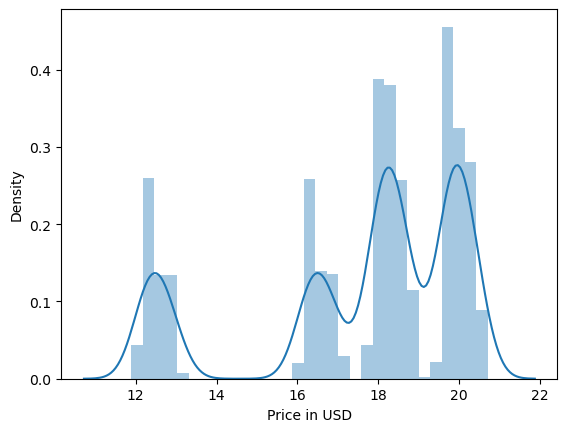

In [10]:
sns.distplot(np.log(df['Price in USD']))

<Axes: xlabel='Model'>

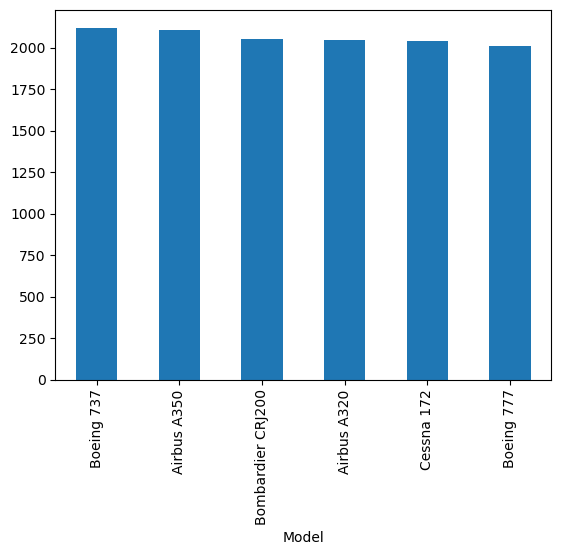

In [11]:
df['Model'].value_counts().plot(kind='bar')

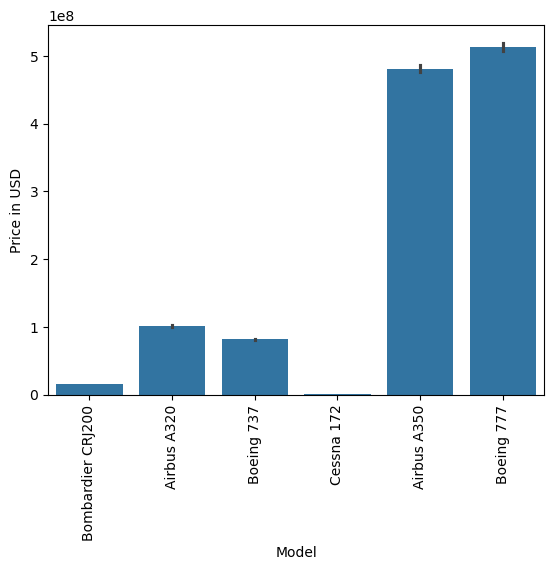

In [12]:
sns.barplot(x='Model',y='Price in USD',data=df)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Engine Type'>

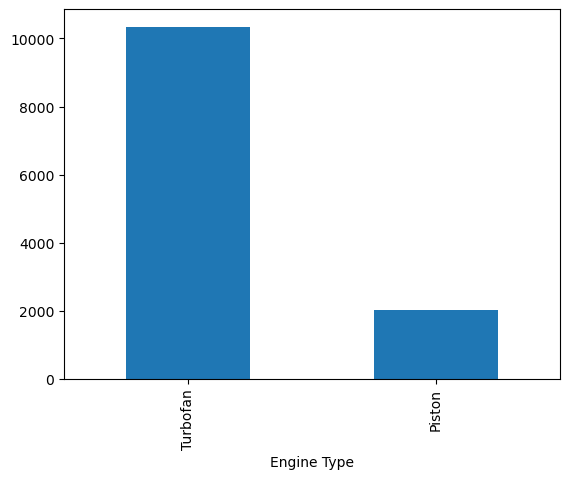

In [13]:
df['Engine Type'].value_counts().plot(kind='bar')

In [14]:
sns.barplot(x='Engine Type',y='Price in USD',data=df)

<Axes: xlabel='Engine Type', ylabel='Price in USD'>

In [15]:
df['Sales Region'].value_counts().plot(kind='bar')

<Axes: xlabel='Sales Region'>

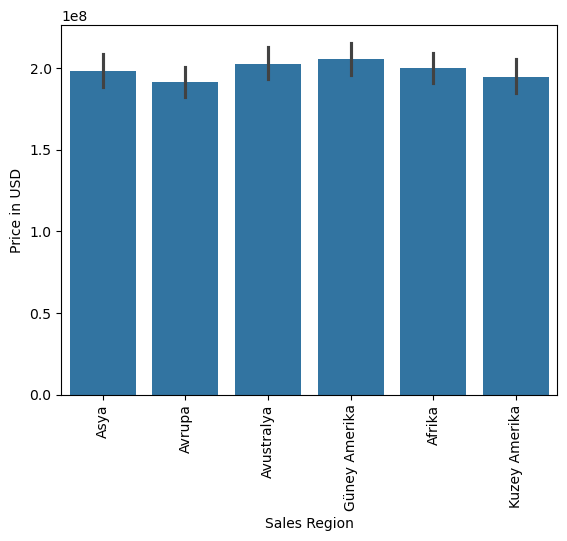

In [16]:
sns.barplot(x='Sales Region',y='Price in USD',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
df.corr(numeric_only=True)['Price in USD']

Production Year                0.197593
Number of Engines              0.385015
Capacity                       0.896319
Range in km                    0.922699
Fuel Consumption in L/hour    -0.309976
Hourly Maintenance Cost ($)   -0.016033
Age                           -0.197593
Price in USD                   1.000000
Name: Price in USD, dtype: float64

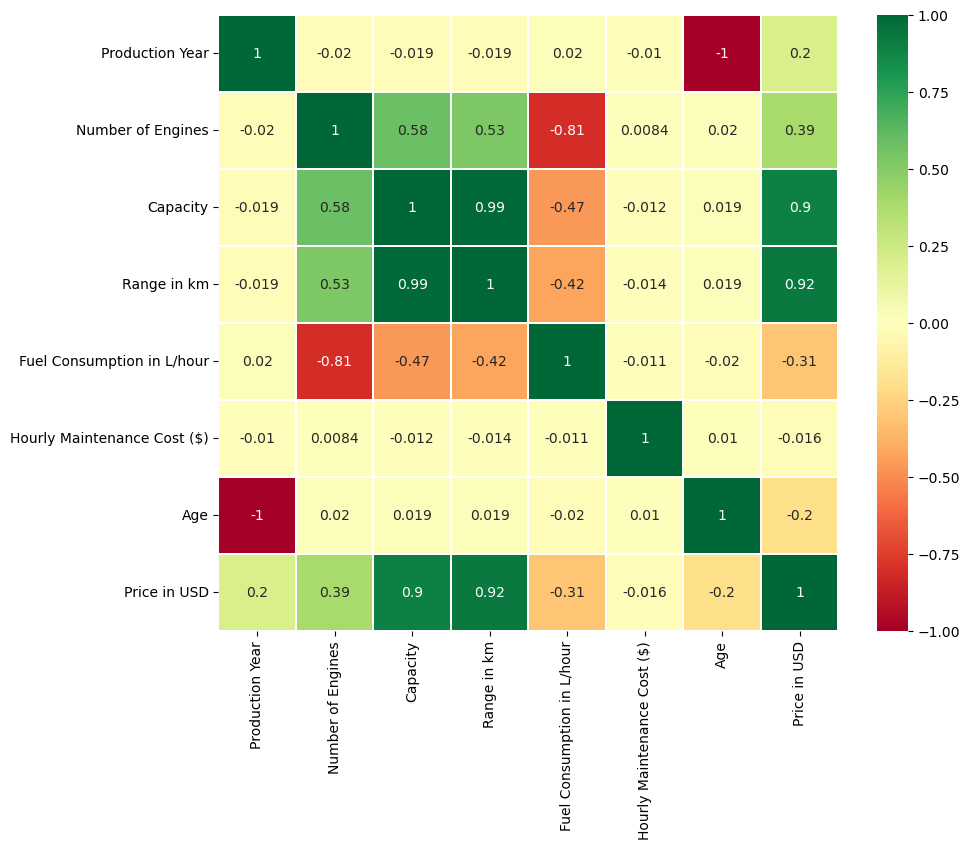

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [19]:
df = df.drop(columns=['Production Year','Hourly Maintenance Cost ($)'])

In [20]:
df.head()

Model  Number of Engines Engine Type  Capacity  Range in km  \
0  Bombardier CRJ200                  2    Turbofan        50         3000   
1  Bombardier CRJ200                  2    Turbofan        50         3000   
2        Airbus A320                  2    Turbofan       180         6300   
3         Boeing 737                  2    Turbofan       162         5700   
4         Cessna 172                  1      Piston         4         1285   

   Fuel Consumption in L/hour  Age   Sales Region  Price in USD  
0                       14.36   36           Asya  1.285708e+07  
1                        4.03   26         Avrupa  1.391406e+07  
2                       13.26   35     Avustralya  9.073570e+07  
3                       14.61    0     Avustralya  1.366597e+08  
4                       18.49   38  Güney Amerika  2.037981e+05

In [21]:
encoder = LabelEncoder()

In [22]:
cat_col = df.select_dtypes(include=['object']).columns
for col in cat_col:
    df[col] = encoder.fit_transform(df[col])

In [23]:
df.head()

Model  Number of Engines  Engine Type  Capacity  Range in km  \
0      4                  2            1        50         3000   
1      4                  2            1        50         3000   
2      0                  2            1       180         6300   
3      2                  2            1       162         5700   
4      5                  1            0         4         1285   

   Fuel Consumption in L/hour  Age  Sales Region  Price in USD  
0                       14.36   36             1  1.285708e+07  
1                        4.03   26             2  1.391406e+07  
2                       13.26   35             3  9.073570e+07  
3                       14.61    0             3  1.366597e+08  
4                       18.49   38             4  2.037981e+05

<Axes: xlabel='Range in km', ylabel='count'>

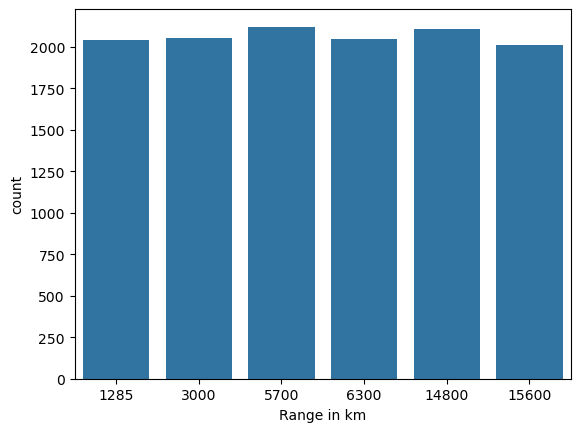

In [24]:
sns.countplot(x='Range in km', data=df)

In [25]:
df['Range in km'] = (df['Range in km']/1280).round(2)

In [26]:
df.head()

Model  Number of Engines  Engine Type  Capacity  Range in km  \
0      4                  2            1        50         2.34   
1      4                  2            1        50         2.34   
2      0                  2            1       180         4.92   
3      2                  2            1       162         4.45   
4      5                  1            0         4         1.00   

   Fuel Consumption in L/hour  Age  Sales Region  Price in USD  
0                       14.36   36             1  1.285708e+07  
1                        4.03   26             2  1.391406e+07  
2                       13.26   35             3  9.073570e+07  
3                       14.61    0             3  1.366597e+08  
4                       18.49   38             4  2.037981e+05

In [27]:
X = df.drop('Price in USD', axis=1)
y = np.log(df['Price in USD'])

In [28]:
X

Model  Number of Engines  Engine Type  Capacity  Range in km  \
0          4                  2            1        50         2.34   
1          4                  2            1        50         2.34   
2          0                  2            1       180         4.92   
3          2                  2            1       162         4.45   
4          5                  1            0         4         1.00   
...      ...                ...          ...       ...          ...   
12372      3                  2            1       396        12.19   
12373      4                  2            1        50         2.34   
12374      2                  2            1       162         4.45   
12375      5                  1            0         4         1.00   
12376      4                  2            1        50         2.34   

       Fuel Consumption in L/hour  Age  Sales Region  
0                           14.36   36             1  
1                            4.03   26             2  
2                           13.26   35             3  
3                           14.61    0             3  
4                           18.49   38             4  
...                           ...  ...           ...  
12372                       12.16   29             2  
12373                        8.26   18             0  
12374                        6.93    8             5  
12375                       14.28   10             0  
12376                        2.42   10             3  

[12377 rows x 8 columns]

In [29]:
y

0        16.369405
1        16.448410
2        18.323461
3        18.733004
4        12.224885
           ...    
12372    19.781162
12373    16.584272
12374    18.407696
12375    12.890483
12376    16.960000
Name: Price in USD, Length: 12377, dtype: float64

## Splitting the Data: Training and Testing sets

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

## Chossing the right model and Building the model

In [31]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)),
    ('XGB Regressor', XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)),
    ('SVR', SVR(kernel='rbf',C=10000,epsilon=0.1)),
    ('Decision Tree', DecisionTreeRegressor(max_depth=10)),
    ('KNN', KNeighborsRegressor(n_neighbors=3)),
    ('AdaBoost Regressor',AdaBoostRegressor(n_estimators=10,learning_rate=1.0)),
    ('GradientBoosting Regressor',GradientBoostingRegressor(n_estimators=500))
]

model_names = []
R2_scores = []
mse = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    model_names.append(name)
    R2_scores.append(r2)
    mse.append(mae)

results_df = pd.DataFrame({
    'Model': model_names,
    'R2 Score': R2_scores,
    'MAE': mse
})

results_df


Model  R2 Score       MAE
0           Linear Regression  0.996463  0.126388
1               Random Forest  0.998356  0.085411
2               XGB Regressor  0.998418  0.084206
3                         SVR  0.998405  0.084668
4               Decision Tree  0.998252  0.087680
5                         KNN  0.998031  0.092724
6          AdaBoost Regressor  0.993917  0.159518
7  GradientBoosting Regressor  0.998443  0.083717

C:\Users\Hp\AppData\Local\Temp\ipykernel_1656\1404998305.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results_df, palette='Blues_d')
C:\Users\Hp\AppData\Local\Temp\ipykernel_1656\1404998305.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=results_df, palette='Reds_d')


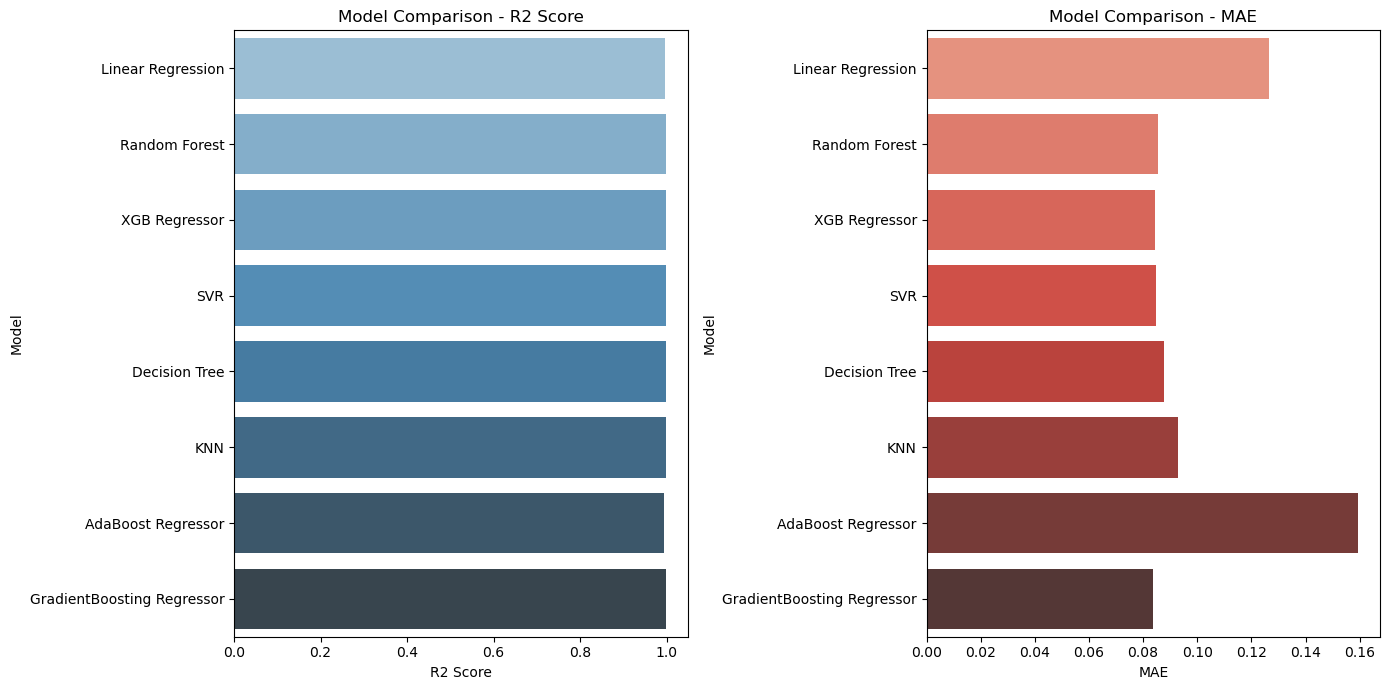

In [32]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='Blues_d')
plt.title('Model Comparison - R2 Score')

plt.subplot(1, 2, 2)
sns.barplot(x='MAE', y='Model', data=results_df, palette='Reds_d')
plt.title('Model Comparison - MAE')

plt.tight_layout()
plt.show()

## Feature Importance from the best model

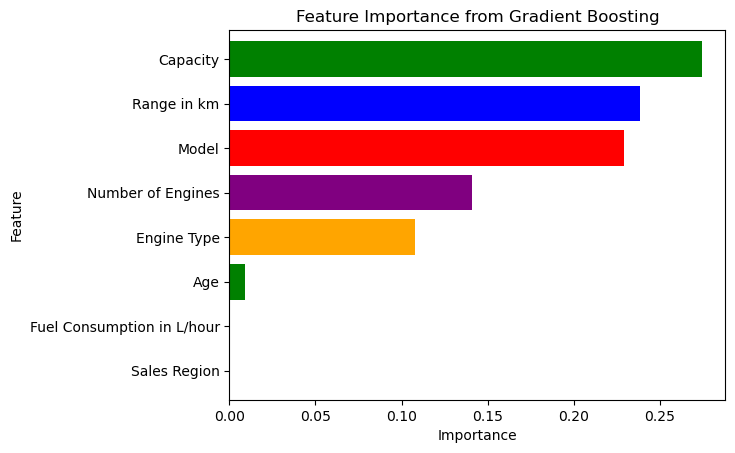

In [33]:
model=GradientBoostingRegressor(n_estimators=500)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,
                                                                                      color=['red', 'blue', 'green', 'orange', 'purple'])
plt.title('Feature Importance from Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()